In [1]:
import matplotlib.pyplot as plt
import numpy as np


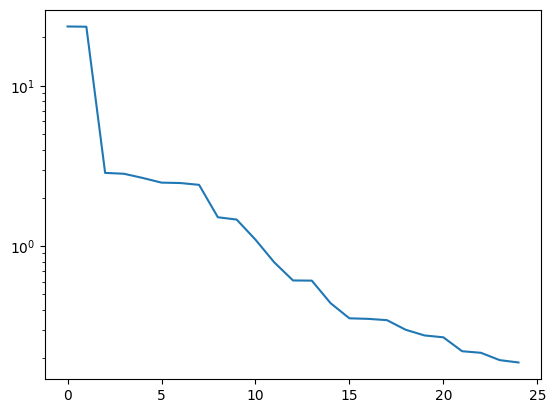

In [2]:
d = np.load("singular_values.npy")

plt.semilogy(d)
plt.show()

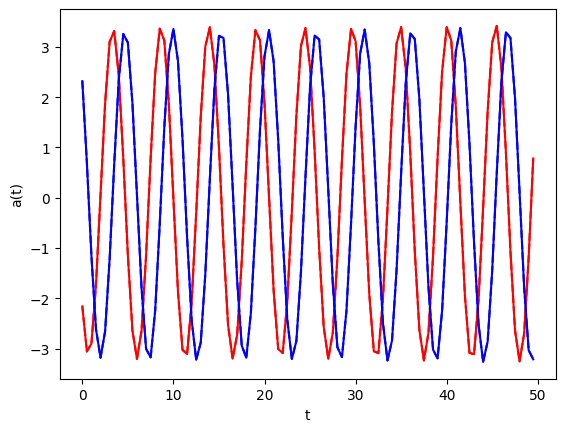

In [3]:
# Time coefficients read from the POD
vt = np.load("right_singular_vectors.npy")
T = np.diag(d)@vt

# Time coefficients projecting the snapshots into a number of modes
M = 4
snaps = T.shape[1]

aa = np.load("projected_coefficients.npy")
time = np.arange(len(aa[0,:]))*0.5    

plt.plot(time, T[0,:], "-r")
plt.plot(time, aa[0,:], "--r")
plt.xlabel("t")
plt.ylabel("a(t)")

plt.plot(time, T[1,:], "-b")
plt.plot(time, aa[1,:], "--b")
plt.xlabel("t")
plt.ylabel("a(t)")
plt.show()

In [4]:
# Get initial conditions
a = np.copy(aa[:,0])

# Set up the solver
dt = 1e-3
nn = int(1/dt * 60)
t = -dt
L = np.zeros(M)

In [5]:
b = np.load("b.npy")
A = np.load("A.npy")
B = np.load("B.npy")

In [6]:
# arrays to store data
tt = []
a_store = np.zeros((M, nn+1))
a_store[:,0] = np.copy(a[:])
t=0
tt.append(t)

# Time stepper
for i in range(0, nn):
    
    t +=dt    
    for k in range(0, M):
        
        L[k] = b[k]
        
        for m in range(0, M):
        
            L[k] = L[k] + A[k,m]*a[m]

        for m in range(0, M):
            for n in range(0, M):
                L[k] =  L[k] + B[k,m,n]*a[n]*a[m]


    for k in range(0, M):
        a[k] = a[k] + dt*L[k]

    tt.append(t)
    a_store[:,i+1] = np.copy(a[:])  

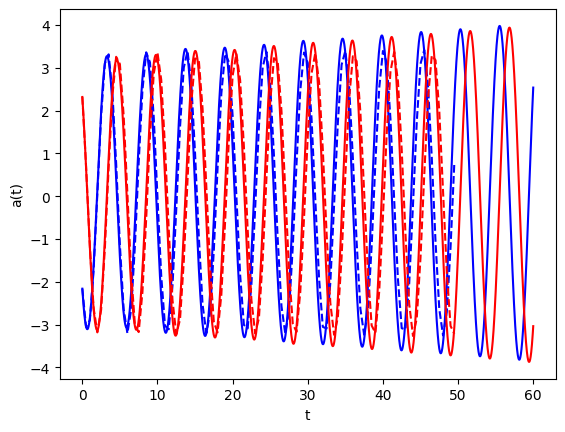

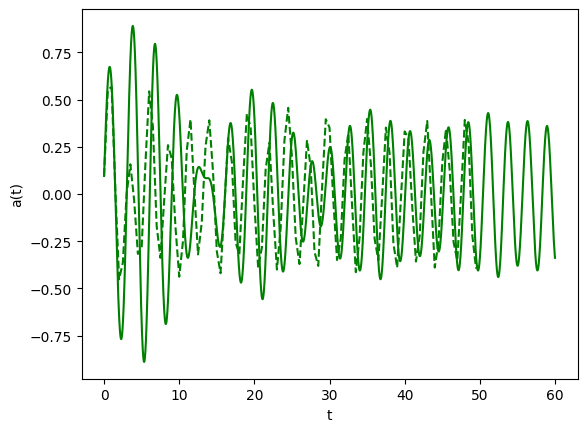

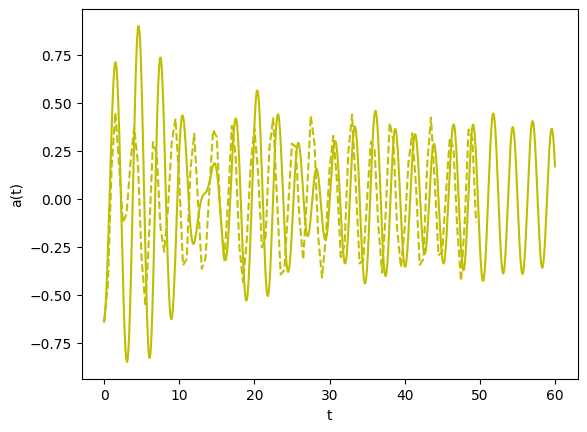

In [7]:
plt.plot(tt, a_store[0,:], "-b")
plt.plot(time, aa[0,:], "--b")
plt.plot(tt, a_store[1,:], "-r")
plt.plot(time, aa[1,:], "--r")
plt.xlabel("t")
plt.ylabel("a(t)")
plt.show()

plt.plot(tt, a_store[2,:], "-g")
plt.plot(time, aa[2,:], "--g")
plt.xlabel("t")
plt.ylabel("a(t)")
plt.show()

plt.plot(tt, a_store[3,:], "-y")
plt.plot(time, aa[3,:], "--y")
plt.xlabel("t")
plt.ylabel("a(t)")
plt.show()

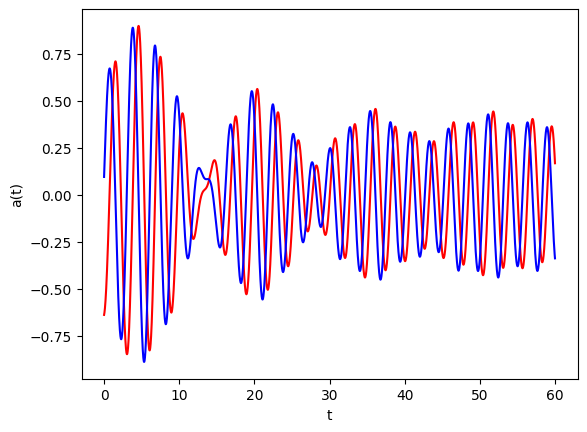

In [9]:
plt.plot(tt, a_store[3,:], "-r")
plt.plot(tt, a_store[2,:], "-b")
plt.xlabel("t")
plt.ylabel("a(t)")
plt.show()